In [1]:
!pip install koreanize_matplotlib
!pip install konlpy
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from konlpy.tag import Okt
from collections import Counter

In [3]:
df = pd.read_csv("./emergency_call_binary.csv", encoding="utf-8-sig")
df.head()

id                      document label
0   1    골목길에서 싸움이 났어요, 다친 사람이 있어요.    긴급
1   2       교통사고가 발생했는데 상대방이 도주했어요.    긴급
2   3       집 근처에서 폭죽 소리가 나고 시끄러워요.    경미
3   4  술집에서 손님끼리 다투고 있어요, 경찰이 필요해요.    긴급
4   5         차에 누가 돌을 던졌어요, 잡아주세요.    경미

In [4]:
df = df.dropna(subset=['document']).reset_index(drop=True)
print('결측치 처리 이후:', len(df))

df = df.drop_duplicates(subset=['document']).reset_index(drop=True)
print('중복 제거 이후:', len(df))

결측치 처리 이후: 300
중복 제거 이후: 300


In [5]:
# 정규표현식으로 [^ㄱ-ㅎㅏ-ㅣ가-힣 ] : 한글 자모/완성형/공백 이외의 모든 문자
df['document'] = df['document'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "",
                                         regex=True)

print('한글 아닌 문자 제거 이후:', len(df))

한글 아닌 문자 제거 이후: 300


In [6]:
df.head()

id                    document label
0   1    골목길에서 싸움이 났어요 다친 사람이 있어요    긴급
1   2      교통사고가 발생했는데 상대방이 도주했어요    긴급
2   3      집 근처에서 폭죽 소리가 나고 시끄러워요    경미
3   4  술집에서 손님끼리 다투고 있어요 경찰이 필요해요    긴급
4   5         차에 누가 돌을 던졌어요 잡아주세요    경미

## Okt() 한국어 형태소 분석기

In [7]:
okt = Okt()
def token_count(text):
    tokens = okt.morphs(text, stem=True)
    return len(tokens)

df = df[df['document'].apply(lambda x: token_count(x) >= 2)].reset_index(drop=True)
print("짧은 문장 제거 후:", len(df))


짧은 문장 제거 후: 300


In [8]:
stopwords = ['에', '의', '가', '이', '은', '들', '는' ]
def clean_tokenize(text):
    tokens = okt.morphs(text, stem=True)
    return [word for word in tokens if word not in stopwords]

df['tokens'] = df['document'].apply(clean_tokenize)
df.head()

id                    document label                               tokens
0   1    골목길에서 싸움이 났어요 다친 사람이 있어요    긴급       [골목길, 에서, 싸움, 나다, 다치다, 사람, 있다]
1   2      교통사고가 발생했는데 상대방이 도주했어요    긴급          [교통사고, 발생, 하다, 상대방, 도주, 하다]
2   3      집 근처에서 폭죽 소리가 나고 시끄러워요    경미        [집, 근처, 에서, 폭죽, 소리, 나다, 시끄럽다]
3   4  술집에서 손님끼리 다투고 있어요 경찰이 필요해요    긴급  [술집, 에서, 손님, 끼리, 다투다, 있다, 경찰, 필요하다]
4   5         차에 누가 돌을 던졌어요 잡아주세요    경미               [차, 누가, 돌, 을, 던지다, 잡다]

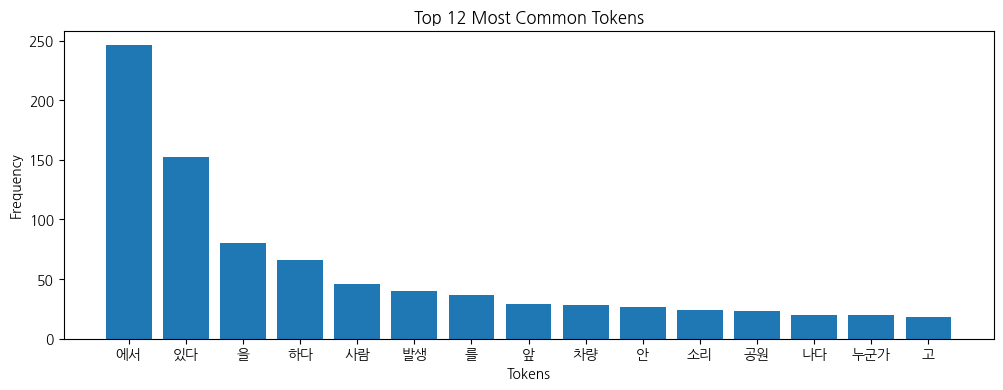

In [9]:
df_token=df['tokens']
all_tokens = [token for tokens in df_token for token in tokens]

counter = Counter(all_tokens)
common_words = counter.most_common(15)
words, freqs = zip(*common_words)

plt.figure(figsize=(12, 4))

plt.bar(words, freqs)
plt.title("Top 12 Most Common Tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()


## (과제) 불용어를 추가해보자

In [10]:
stopwords = ['에', '의', '가', '이', '은', '들', '는' ,
            '을', '를', '에서', '있다', '고']
df['tokens'] = df['document'].apply(clean_tokenize)
df.head()

id                    document label                       tokens
0   1    골목길에서 싸움이 났어요 다친 사람이 있어요    긴급       [골목길, 싸움, 나다, 다치다, 사람]
1   2      교통사고가 발생했는데 상대방이 도주했어요    긴급  [교통사고, 발생, 하다, 상대방, 도주, 하다]
2   3      집 근처에서 폭죽 소리가 나고 시끄러워요    경미    [집, 근처, 폭죽, 소리, 나다, 시끄럽다]
3   4  술집에서 손님끼리 다투고 있어요 경찰이 필요해요    긴급  [술집, 손님, 끼리, 다투다, 경찰, 필요하다]
4   5         차에 누가 돌을 던졌어요 잡아주세요    경미          [차, 누가, 돌, 던지다, 잡다]

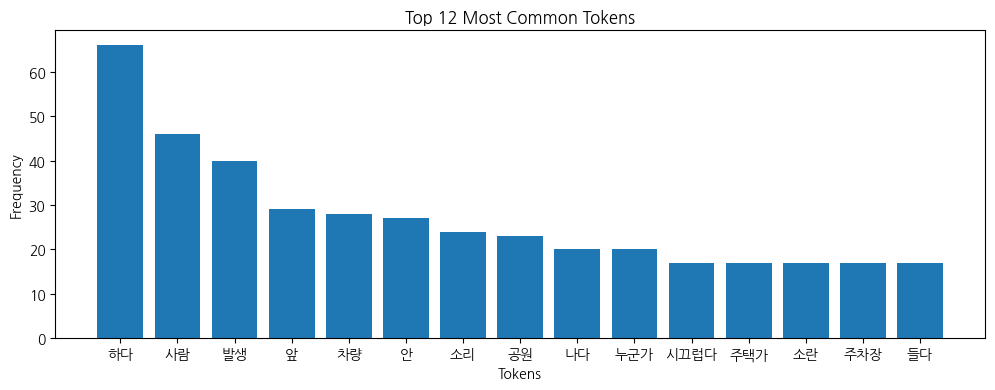

In [11]:
df_token=df['tokens']
all_tokens = [token for tokens in df_token for token in tokens]

counter = Counter(all_tokens)
common_words = counter.most_common(15)
words, freqs = zip(*common_words)

plt.figure(figsize=(12, 4))

plt.bar(words, freqs)
plt.title("Top 12 Most Common Tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()


### 토큰을 저장해보자.

In [12]:
df.to_csv('./emergency_call_tokens.csv', encoding="utf-8-sig")